In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

## Load dataset

In [2]:
df = pd.read_csv('WA_FnUseC_TelcoCustomerChurn.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Preprocessing

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
(df['TotalCharges'].isna().sum()/len(df['TotalCharges'].value_counts()))*100

0.16845329249617153

In [8]:
df = df.dropna()

mendrop missing values karena jumlahnya tidak signifikan

In [9]:
(len(df[df['Churn'] == 'Yes'].value_counts())/len(df))*100

26.578498293515356

In [10]:
category = df.select_dtypes(include=['object'])
display(category.columns)
category

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,2234-XADUH,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,4801-JZAZL,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,8361-LTMKD,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [11]:
nums = df.select_dtypes(include=['float64', 'int64'])
display(nums.columns)
nums

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [12]:
nums.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
for i in category:
    print(f"Value counts of {i} column")
    print(df[i].value_counts(), '\n')

Value counts of customerID column
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: customerID, Length: 7032, dtype: int64 

Value counts of gender column
Male      3549
Female    3483
Name: gender, dtype: int64 

Value counts of Partner column
No     3639
Yes    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Value counts of PhoneService column
Yes    6352
No      680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
No                     3497
Yes                    2015
No i

In [14]:
for n in nums:
    print(f"Value counts of {n} column")
    print(df[n].value_counts(), '\n')

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of tenure column
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Value counts of MonthlyCharges column
20.05     61
19.90     44
19.95     44
19.85     44
19.65     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1584, dtype: int64 

Value counts of TotalCharges column
20.20      11
19.75       9
20.05       8
19.90       8
19.65       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6530, dtype: int64 



In [15]:
dum_gender = pd.get_dummies(df['gender'], prefix= 'gender')
dum_partner = pd.get_dummies(df['Partner'], prefix= 'Partner')
dum_dep = pd.get_dummies(df['Dependents'], prefix= 'Dependents')
dum_PS = pd.get_dummies(df['PhoneService'], prefix= 'PhoneService')
dum_multi = pd.get_dummies(df['MultipleLines'], prefix= 'MultipleLines')
dum_intserv = pd.get_dummies(df['InternetService'], prefix= 'InternetService')
dum_OS = pd.get_dummies(df['OnlineSecurity'], prefix= 'OnlineSecurity')
dum_OB = pd.get_dummies(df['OnlineBackup'], prefix= 'OnlineBackup')
dum_DP = pd.get_dummies(df['DeviceProtection'], prefix= 'DeviceProtection')
dum_TS = pd.get_dummies(df['TechSupport'], prefix= 'TechSupport')
dum_ST = pd.get_dummies(df['StreamingTV'], prefix= 'StreamingTV')
dum_SM = pd.get_dummies(df['StreamingMovies'], prefix= 'StreamingMovies')
dum_con = pd.get_dummies(df['Contract'], prefix= 'Contract')
dum_PB = pd.get_dummies(df['PaperlessBilling'], prefix='PaperlessBilling')
dum_PM = pd.get_dummies(df['PaymentMethod'], prefix= 'PaymentMethod')
dum_churn = pd.get_dummies(df['Churn'], prefix= 'Churn')
dum_SC = pd.get_dummies(df['SeniorCitizen'], prefix= 'SeniorCitizen')

In [16]:
df_cat = pd.concat([df, dum_gender, dum_partner, dum_dep, dum_PS, dum_multi, dum_intserv, dum_OS, dum_OB,
                   dum_DP, dum_TS, dum_ST, dum_SM, dum_con, dum_PB, dum_PM, dum_churn, dum_SC], axis= 1)

df_cat

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_0,SeniorCitizen_1
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,1,0,0,1,0,1,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,1,0,0,0,0,1,1,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,1,0,0,0,1,0,1,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,1,0,1,0,0,0,1,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,0,1,0,0,0,1,1,0,1,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,0,1,0,1,0,0,1,0,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,0,1,0,0,1,0,1,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,0,1,0,0,0,1,0,1,0,1


In [17]:
df_cat = df_cat.drop(['customerID'], axis=1)

In [18]:
df_cat

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_0,SeniorCitizen_1
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,0,1,0,0,1,0,1,0,1,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,1,0,0,0,0,1,1,0,1,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,0,1,0,0,0,1,0,1,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,1,0,1,0,0,0,1,0,1,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,0,1,0,0,0,1,1,0,1,0
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,0,1,0,1,0,0,1,0,1,0
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,0,1,0,0,1,0,1,0,1,0
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,0,1,0,0,0,1,0,1,0,1


In [19]:
df_cat = df_cat.drop(['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'MonthlyCharges', 'TotalCharges', 'tenure', 'SeniorCitizen'], axis=1)

df_cat

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,SeniorCitizen_0,SeniorCitizen_1
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,1,0,1,0
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,1,1,0
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,1,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,1,0,1,0
7039,1,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
7040,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
7041,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,0,1


In [20]:
nums = pd.concat([nums, dum_churn], axis=1)

nums

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_No,Churn_Yes
0,0,1,29.85,29.85,1,0
1,0,34,56.95,1889.50,1,0
2,0,2,53.85,108.15,0,1
3,0,45,42.30,1840.75,1,0
4,0,2,70.70,151.65,0,1
...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,0
7039,0,72,103.20,7362.90,1,0
7040,0,11,29.60,346.45,1,0
7041,1,4,74.40,306.60,0,1


In [21]:
nums = nums.drop(['SeniorCitizen'], axis=1)

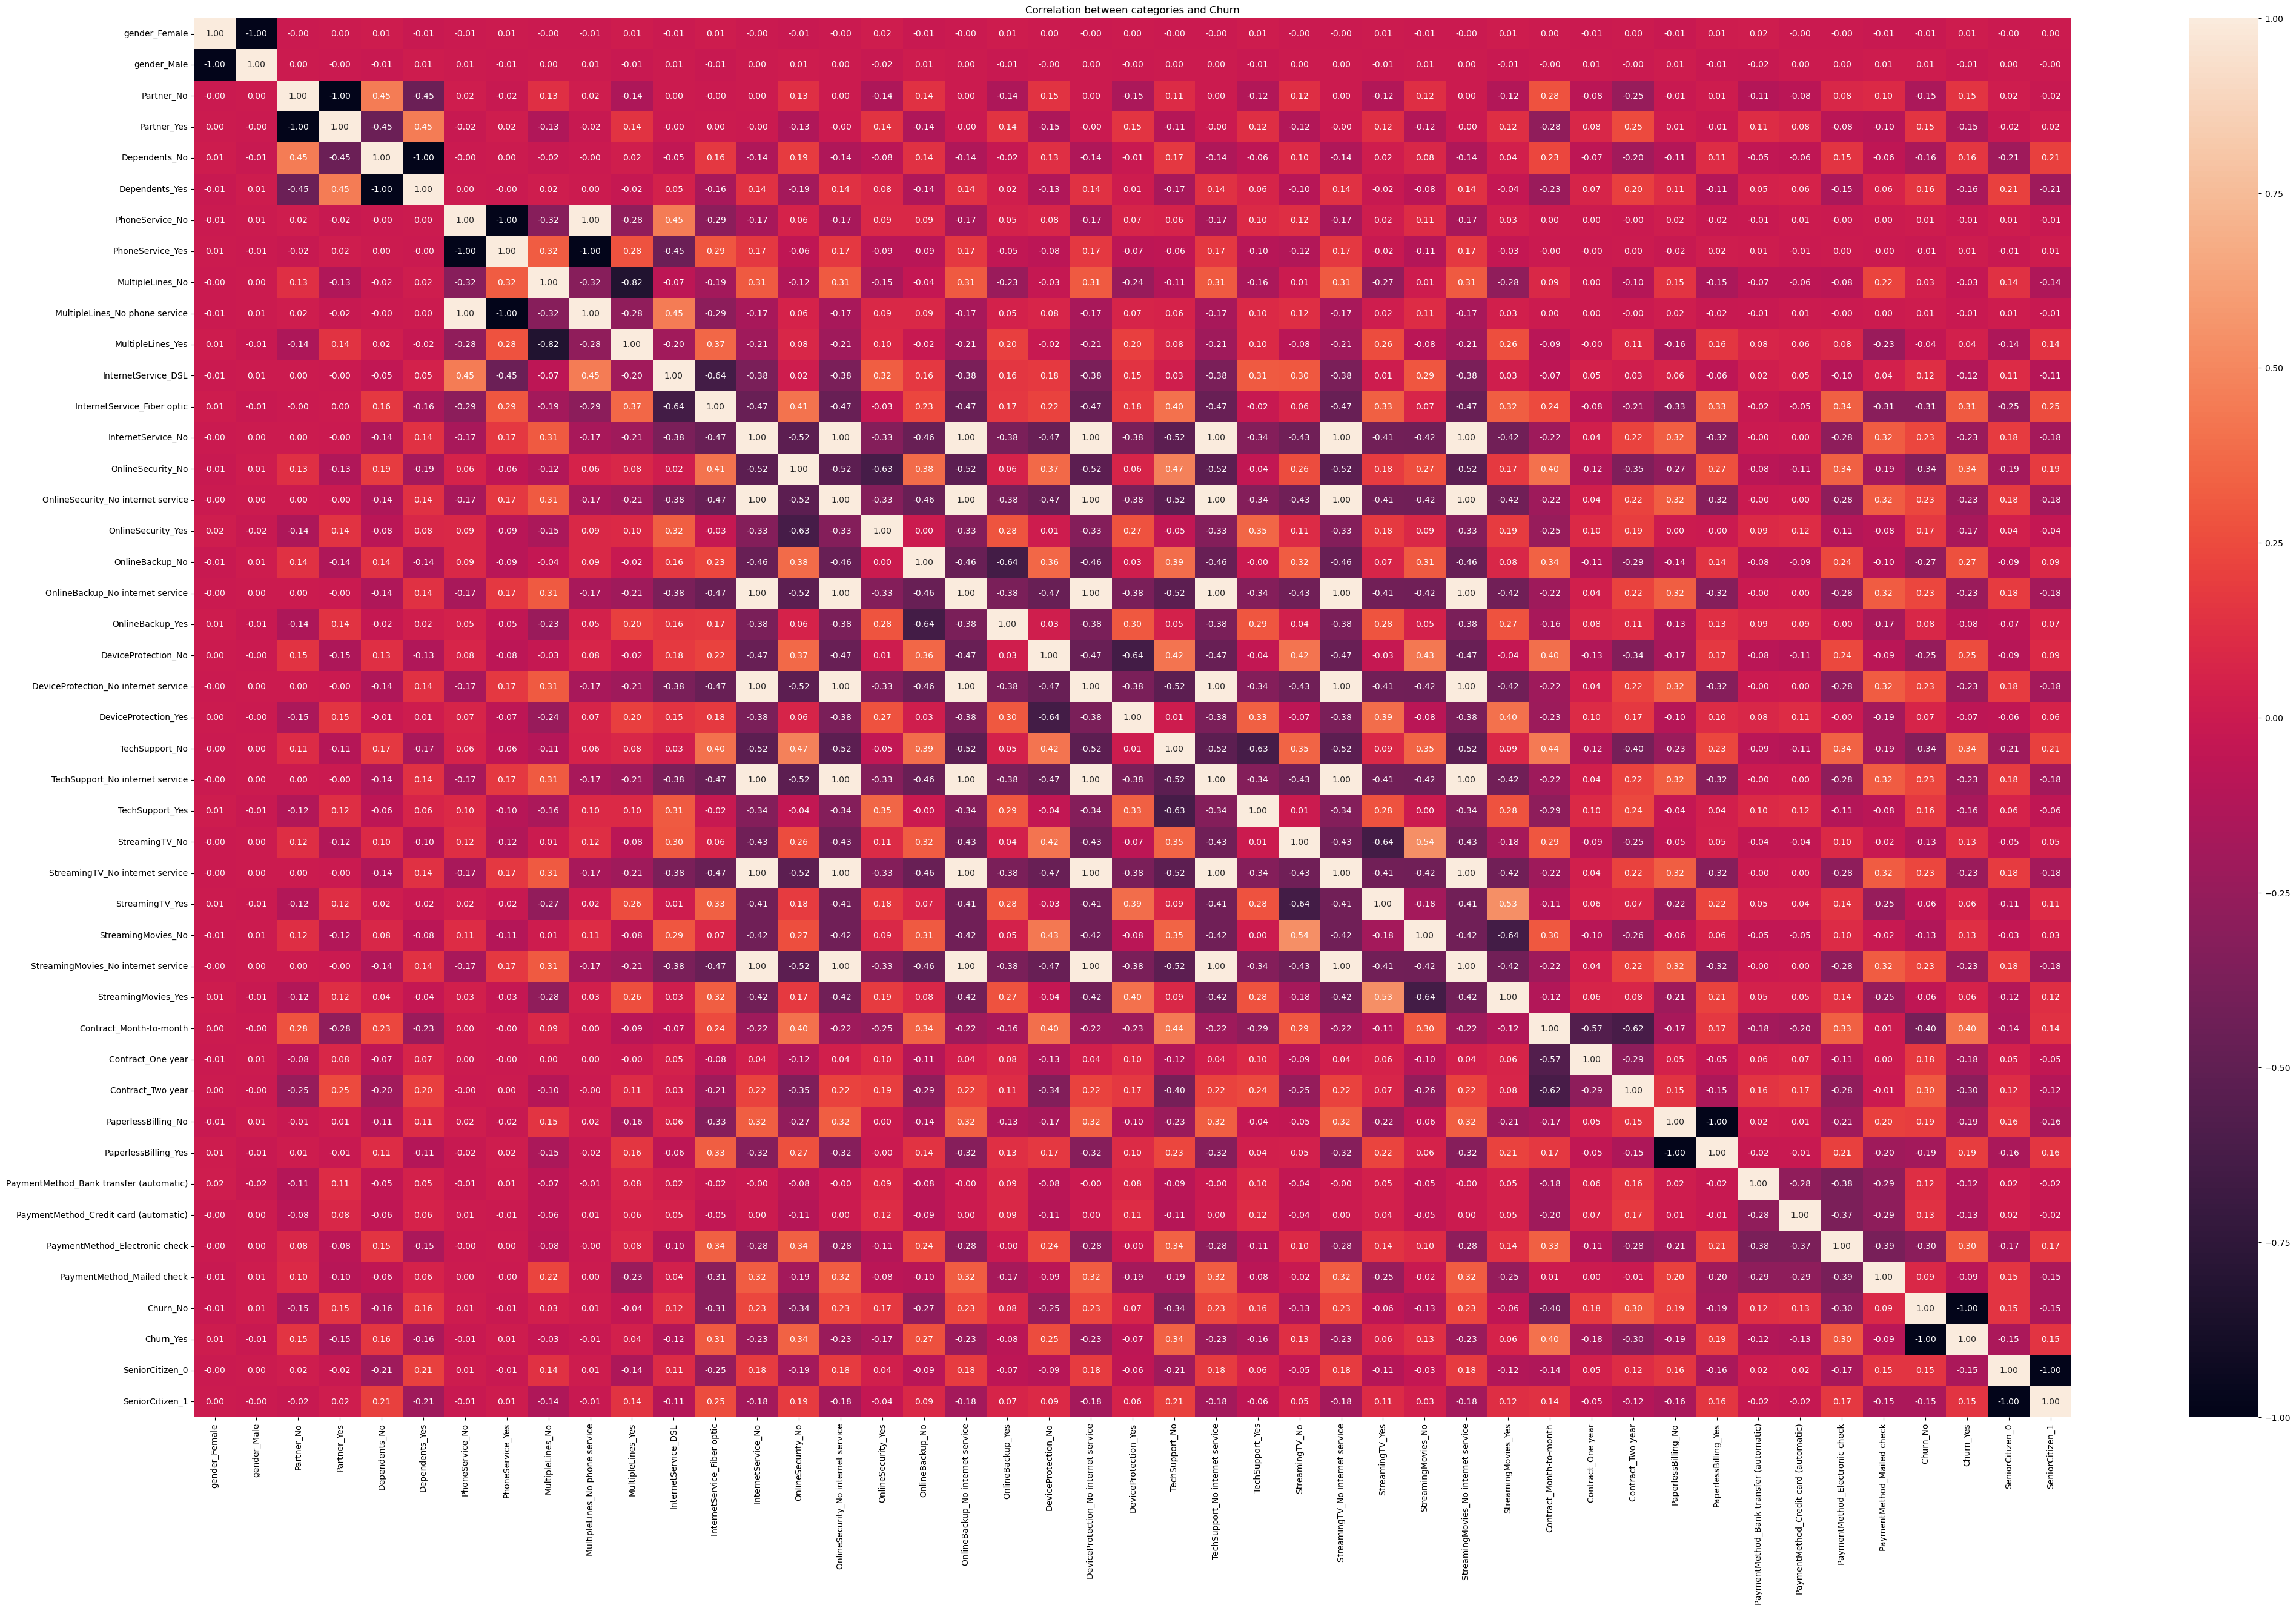

In [22]:
corr = df_cat.corr()

plt.figure(figsize=(50,30))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation between categories and Churn')
plt.show() #double klik untuk melihat heatmap secara detail

In [23]:
corr['Churn_Yes'].sort_values(ascending=False)

Churn_Yes                                  1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen_1                            0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
PhoneService_Yes                           0.011691
gender_Female                              0.008545
gender_Male 

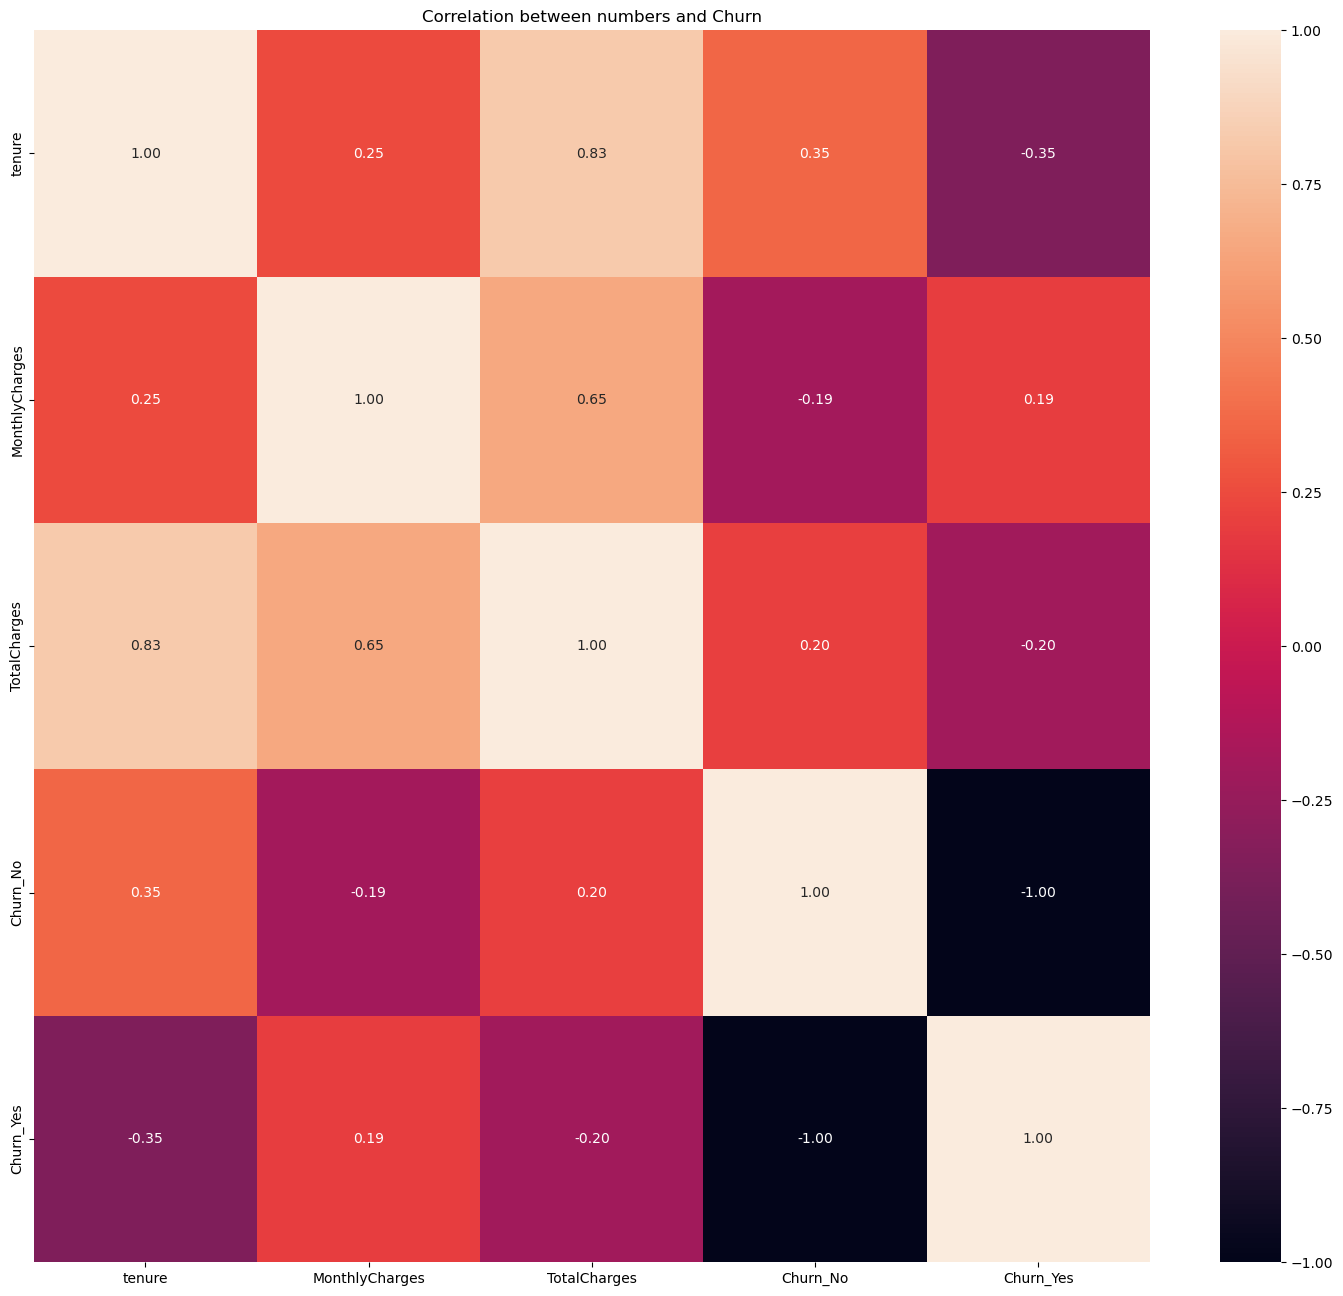

In [24]:
corr_nums = nums.corr()

plt.figure(figsize=(18,16))
sns.heatmap(corr_nums, annot=True, fmt='.2f')
plt.title('Correlation between numbers and Churn')
plt.show()

In [25]:
corr_nums['Churn_Yes'].sort_values(ascending=False)

Churn_Yes         1.000000
MonthlyCharges    0.192858
TotalCharges     -0.199484
tenure           -0.354049
Churn_No         -1.000000
Name: Churn_Yes, dtype: float64

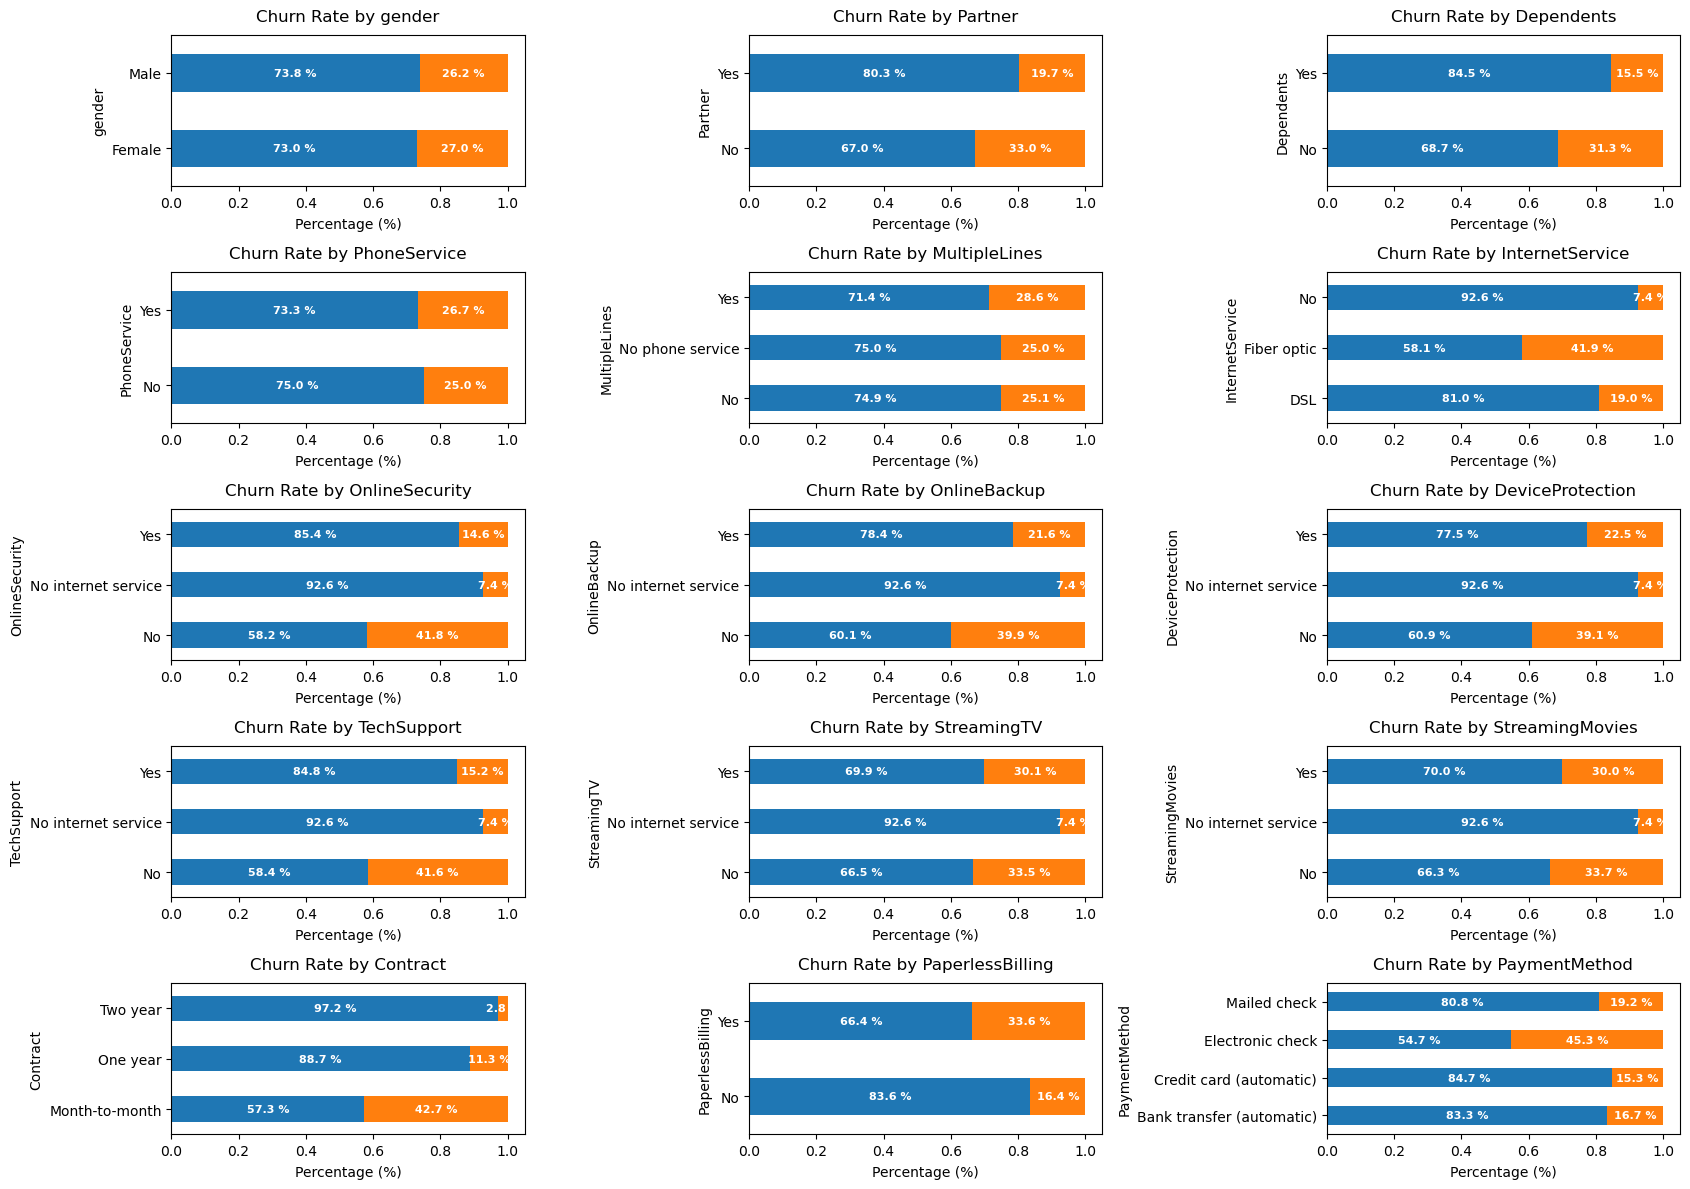

In [26]:
columns_to_plot = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Mendeklarasikan subplot dengan objek sumbu matplotlib
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(17, 12))

for i, column in enumerate(columns_to_plot):
    # Menghitung proporsi dan melakukan plotting
    ax = pd.crosstab(df[column], df['Churn'], normalize='index').plot.barh(stacked=True, ax = axes[i // 3, i % 3])
    ax.legend(bbox_to_anchor=(0.5, 0.5), title='Is Churn', fontsize=10, title_fontsize=10, labels=['No', 'Yes'], loc='lower left')
    ax.legend().remove()

    # Menambahkan label persentase
    j = 1
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, y+height/2, '{:.1f} %'.format(width*100),  # Perhatikan perubahan di sini
                horizontalalignment='center', verticalalignment='center',
                color='white', fontsize=8, weight='bold')
        j += 1

    # Menambahkan judul dan label sumbu
    ax.set_title(f'Churn Rate by {column}', fontsize=12, pad=10)
    ax.set_xlabel('Percentage (%)', fontsize=10, labelpad=5)  # Perhatikan perubahan di sini
    ax.set_ylabel(column, fontsize=10)

# Menyusun tata letak subplot
plt.tight_layout()
plt.show()

In [27]:
numeric = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

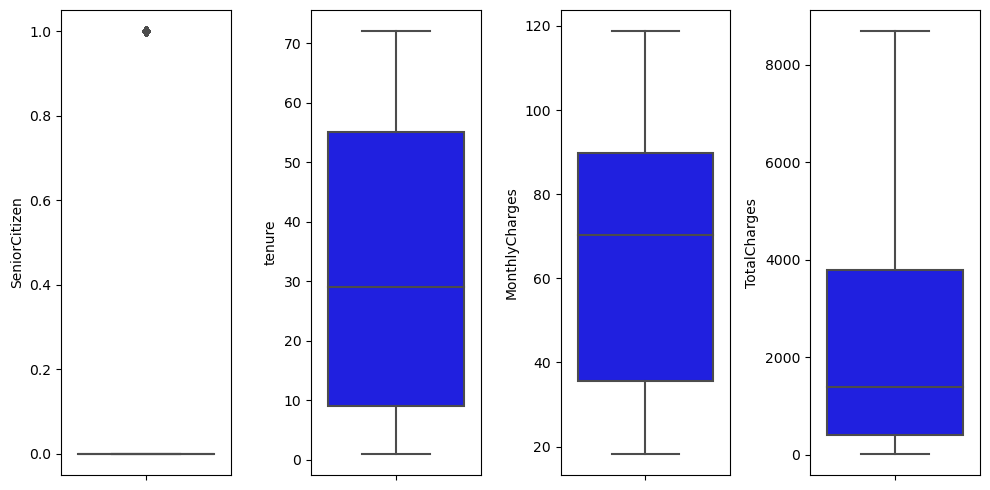

In [28]:
numb = numeric

plt.figure(figsize=(10,5))
for i in range(0, len(numb)):
    plt.subplot(1, len(numb), i+1)
    sns.boxplot(y= df[numb[i]], color= 'blue')
    plt.tight_layout()

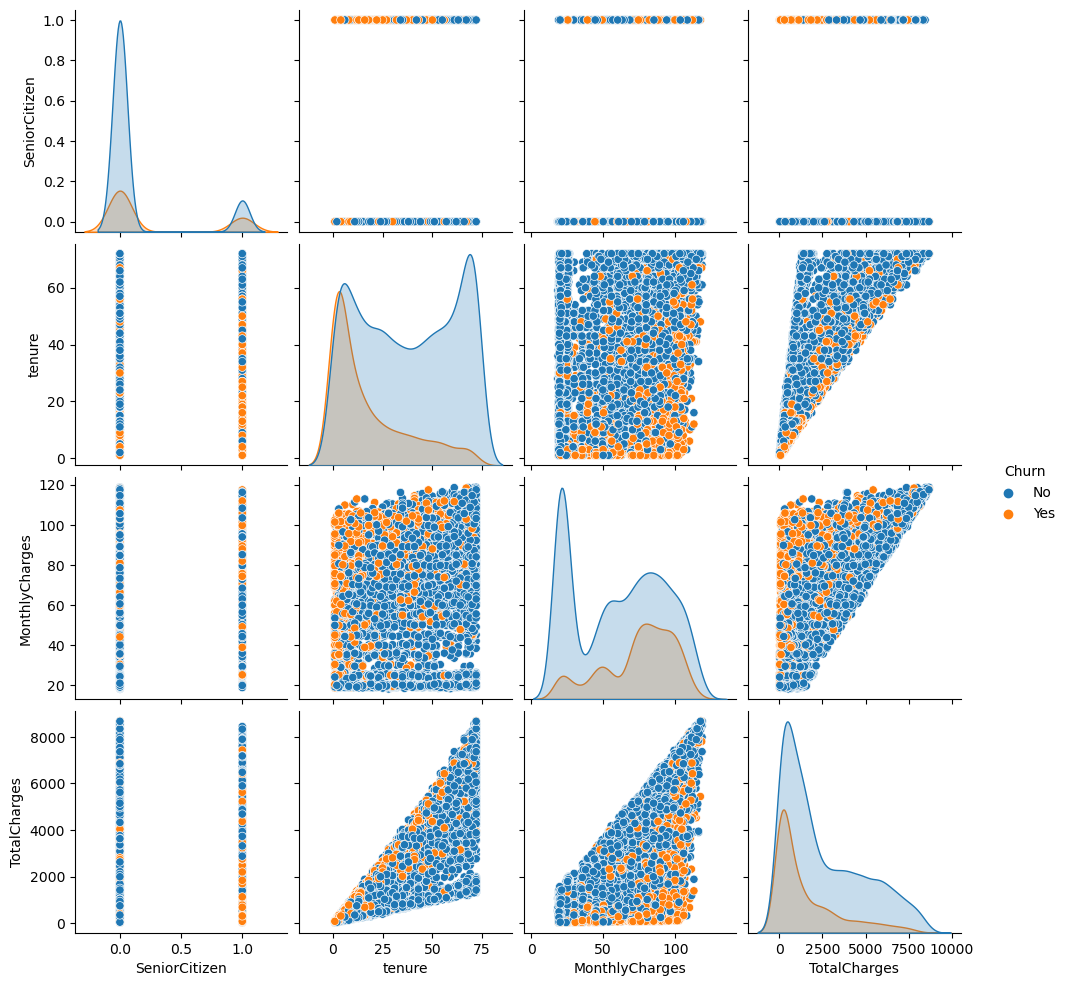

In [29]:
sns.pairplot(df, hue='Churn')

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

features_vif = df.drop(columns= 'Churn')

X = add_constant(nums)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,tenure,5.875290
2,MonthlyCharges,3.525402
3,TotalCharges,9.719105
4,Churn_No,inf
5,Churn_Yes,inf


In [30]:
df_fin = df.copy()

df_fin

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [31]:
display(category.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [32]:
df_fin = df_fin.drop(['customerID'], axis=1)



melakukan drop pada kolom customer_id karena kolom tersebut tidak memiliki dampak yang signifikan 

In [33]:
df_fin['gender'] = df_fin['gender'].map({'Male': 1, 'Female': 0})
df_fin['Partner'] = df_fin['Partner'].map({'Yes': 1, 'No': 0})
df_fin['Dependents'] = df_fin['Dependents'].map({'Yes': 1, 'No': 0})
df_fin['PhoneService'] = df_fin['PhoneService'].map({'Yes': 1, 'No': 0})
df_fin['PaperlessBilling'] = df_fin['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df_fin['Churn'] = df_fin['Churn'].map({'Yes': 1, 'No': 0})

df_fin

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1


In [34]:
pemetaan_ML = {'Yes' : 2,
               'No'  : 1,
               'No phone service' : 0}

pemetaan_IS = {'DSL' : 1,
               'No'  : 0,
               'Fiber optic' : 2}

pemetaan_OS = {'Yes' : 2,
                'No' : 0,
              'No internet service' : 1}

pemetaan_OB = {'Yes' : 2,
                'No' : 0,
                'No internet service' : 1}

pemetaan_DP = {'Yes' : 2,
                'No' : 0,
                'No internet service' : 1}

pemetaan_TS = {'Yes' : 2,
                'No' : 0,
                'No internet service' : 1}

pemetaan_STV = {'Yes' : 2,
                'No' : 0,
                'No internet service' : 1}

pemetaan_SM = {'Yes' : 2,
                'No' : 0,
                'No internet service' : 1}

pemetaan_con = {'Month-to-month' : 0,
                'One year' : 1,
                'Two year' : 2}

pemetaan_PM = {'Electronic check' : 3,
                'Mailed check' : 2,
                'Bank transfer (automatic)' : 1,
                'Credit card (automatic)': 0}

In [35]:
df_fin['MultipleLines'] = df_fin['MultipleLines'].map(pemetaan_ML)
df_fin['InternetService'] = df_fin['InternetService'].map(pemetaan_IS)
df_fin['OnlineSecurity'] = df_fin['OnlineSecurity'].map(pemetaan_OS)
df_fin['OnlineBackup'] = df_fin['OnlineBackup'].map(pemetaan_OB)
df_fin['DeviceProtection'] = df_fin['DeviceProtection'].map(pemetaan_DP)
df_fin['TechSupport'] = df_fin['TechSupport'].map(pemetaan_TS)
df_fin['StreamingTV'] = df_fin['StreamingTV'].map(pemetaan_STV)
df_fin['StreamingMovies'] = df_fin['StreamingMovies'].map(pemetaan_SM)
df_fin['Contract'] = df_fin['Contract'].map(pemetaan_con)
df_fin['PaymentMethod'] = df_fin['PaymentMethod'].map(pemetaan_PM)

df_fin

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,2,0,0,0,0,0,1,3,29.85,29.85,0
1,1,0,0,0,34,1,1,1,2,0,2,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,1,1,2,2,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,2,0,2,2,0,0,1,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,2,0,0,0,0,0,0,0,1,3,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,2,0,2,2,2,2,1,1,2,84.80,1990.50,0
7039,0,0,1,1,72,1,2,2,0,2,2,0,2,2,1,1,0,103.20,7362.90,0
7040,0,0,1,1,11,0,0,1,2,0,0,0,0,0,0,1,3,29.60,346.45,0
7041,1,1,1,0,4,1,2,2,0,0,0,0,0,0,0,1,2,74.40,306.60,1


In [36]:
for col in df_fin:
    print(f"Value counts of {col} column")
    print(df_fin[col].value_counts(), '\n')

Value counts of gender column
1    3549
0    3483
Name: gender, dtype: int64 

Value counts of SeniorCitizen column
0    5890
1    1142
Name: SeniorCitizen, dtype: int64 

Value counts of Partner column
0    3639
1    3393
Name: Partner, dtype: int64 

Value counts of Dependents column
0    4933
1    2099
Name: Dependents, dtype: int64 

Value counts of tenure column
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64 

Value counts of PhoneService column
1    6352
0     680
Name: PhoneService, dtype: int64 

Value counts of MultipleLines column
1    3385
2    2967
0     680
Name: MultipleLines, dtype: int64 

Value counts of InternetService column
2    3096
1    2416
0    1520
Name: InternetService, dtype: int64 

Value counts of OnlineSecurity column
0    3497
2    2015
1    1520
Name: OnlineSecurity, dtype: int64 

Value counts of OnlineBackup column
0    3087
2    2425
1    1520
Name: O

In [37]:
df_fin['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [38]:
df_fin2 = pd.concat([df, dum_gender, dum_partner, dum_dep, dum_PS, dum_multi, dum_intserv, dum_OS, dum_OB,
                   dum_DP, dum_TS, dum_ST, dum_SM, dum_con, dum_PB, dum_PM], axis= 1)

df_fin2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,0,1,0,0,0,1,0,0,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,0,0,1,0,1,0,0,0,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,0,1,0,0,0,1,0,0,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,0,0,1,0,1,0,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,1,0,1,0,0,1,0,0,0,1
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,1,0,1,0,0,1,0,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,0,1,0,0,0,1,0,0,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,0,1,0,0,0,1,0,0,0,1


In [39]:
df_fin2 = df_fin2.drop(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'], axis= 1)

In [40]:
df_fin2['Churn'] = df_fin2['Churn'].map({'Yes': 1, 'No': 0})

In [41]:
df_fin2

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


### Undersampling

In [42]:
from imblearn import under_sampling, over_sampling

Xu = df_fin2.drop(columns= 'Churn')
yu = df_fin2[['Churn']]



In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Xu)
Xunder_std = scaler.transform(Xu)

In [44]:
X_under,y_under = under_sampling.RandomUnderSampler().fit_resample(Xunder_std,yu)

In [45]:
df_fin_under = pd.DataFrame(X_under, columns=Xu.columns)
df_fin_under['Churn'] = y_under

In [46]:
X_ml = df_fin_under.drop(columns= 'Churn')
y_ml = df_fin_under[['Churn']]

In [47]:
from sklearn.model_selection import train_test_split 
Xu_train, Xu_test,yu_train,yu_test = train_test_split(X_ml,
                                                y_ml,
                                                test_size = 0.25,
                                                random_state = 42)

### Oversampling

In [48]:
X_over = df_fin2.drop(columns= 'Churn')
y_over = df_fin2[['Churn']]

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_over)
Xo_std = scaler.transform(X_over)

In [50]:
Xover_train, X_val, yover_train, y_val = train_test_split(Xo_std,
                                                         y_over,
                                                         test_size = 0.25,
                                                         random_state = 42)

In [51]:
from imblearn import under_sampling, over_sampling

#smote

X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(Xover_train, yover_train)

In [52]:
Xo_train, Xo_test, yo_train, yo_test = train_test_split(X_over_smote, 
                                                        y_over_smote,
                                                       test_size = 0.25,
                                                       random_state = 42)

### non imbalance handling

In [53]:
feature = df_fin2.drop(columns= 'Churn')
target = df_fin2[['Churn']]

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(feature)
X_std = scaler.transform(feature)

In [55]:
from sklearn.model_selection import train_test_split 
X_train, X_test,y_train,y_test = train_test_split(X_std,
                                                target,
                                                test_size = 0.25,
                                                random_state = 42)

## Modeling (Gunakan lebih min 2 model dan bandingkan hasil evaluasinya)

In [56]:
df_imbalance = pd.DataFrame(columns=['method', 'accuracy', 'auc_score','precision', 'recall', 'f1_score'])
df_unders = pd.DataFrame(columns=['method', 'accuracy', 'auc_score', 'precision', 'recall', 'f1_score'])
df_overs = pd.DataFrame(columns=['method', 'accuracy', 'auc_score', 'precision', 'recall', 'f1_score'])

In [57]:
df_imbalance

,method,accuracy,auc_score,precision,recall,f1_score


In [58]:
df_unders

,method,accuracy,auc_score,precision,recall,f1_score


In [59]:
df_overs

,method,accuracy,auc_score,precision,recall,f1_score


In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, f1_score
from sklearn.metrics import precision_score, recall_score

#Under_sampling models

Tree = DecisionTreeClassifier()
xg = xgb.XGBClassifier()
forest = RandomForestClassifier()
logreg = LogisticRegression()

models = [Tree,
         xg,
         forest,
         logreg]


for model in models:
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    method = str(type(model)).split('.')[-1][:-2]
    
    acc = accuracy_score(y_test, y_predict)
    clas = classification_report(y_test, y_predict, digits= 6)
    roc = roc_auc_score(y_test, y_predict)
    preci = precision_score(y_test, y_predict)
    rec = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    #print(f'{model} accuracy: {acc}, and auc score: {roc}')
    #print(clas)
    
    df_imbalance = df_imbalance.append({'method' : method,
                                'accuracy' : acc,
                                'auc_score' : roc,
                                'precision' : preci,
                                'recall' : rec,
                                'f1_score' : f1}, ignore_index=True)

    
df_imbalance
    
    



,method,accuracy,auc_score,precision,recall,f1_score
0,DecisionTreeClassifier,0.723549,0.656103,0.472000,0.515284,0.492693
1,XGBClassifier,0.775313,0.689689,0.577778,0.510917,0.542294
2,RandomForestClassifier,0.781001,0.677980,0.603989,0.462882,0.524104
3,LogisticRegression,0.790102,0.701811,0.615584,0.517467,0.562278
4,DecisionTreeClassifier,0.735495,0.690343,0.493671,0.596070,0.540059
5,XGBClassifier,0.760523,0.691710,0.539785,0.548035,0.543879
6,RandomForestClassifier,0.763367,0.701411,0.543568,0.572052,0.557447
7,LogisticRegression,0.752560,0.765519,0.516358,0.792576,0.625323
8,DecisionTreeClassifier,0.723549,0.656103,0.472000,0.515284,0.492693
9,XGBClassifier,0.775313,0.689689,0.577778,0.510917,0.542294


In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, f1_score

#Over_sampling models

Tree = DecisionTreeClassifier()
xg = xgb.XGBClassifier()
forest = RandomForestClassifier()
logreg = LogisticRegression()

models = [Tree,
         xg,
         forest,
         logreg]


for model in models:
    model.fit(Xo_train, yo_train)
    pred_test = model.predict(Xo_test)
    pred_val = model.predict(X_val)
    roc = roc_auc_score(y_val, pred_val)
    clas_test = classification_report(yo_test, pred_test, digits= 6)
    clas_val = classification_report(y_val, pred_val, digits= 6)
    roc = roc_auc_score(y_val, pred_val)
    preci = precision_score(y_val, y_predict)
    rec = recall_score(y_test, y_predict)
    f1 = f1_score(y_test, y_predict)
    print(f'{model}: ')
    print(f'roc_auc_score: {roc}')
    print(clas_test)
    print(clas_val)
    
    
    
    

DecisionTreeClassifier(): 
roc_auc_score: 0.682389989922741
              precision    recall  f1-score   support

           0   0.770021  0.776398  0.773196       966
           1   0.774530  0.768116  0.771310       966

    accuracy                       0.772257      1932
   macro avg   0.772275  0.772257  0.772253      1932
weighted avg   0.772275  0.772257  0.772253      1932

              precision    recall  f1-score   support

           0   0.843121  0.773077  0.806581      1300
           1   0.478799  0.591703  0.529297       458

    accuracy                       0.725825      1758
   macro avg   0.660960  0.682390  0.667939      1758
weighted avg   0.748206  0.725825  0.734342      1758

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
        

In [63]:
df_overs = df_overs.append({'method' : method,
                                'accuracy' : acc,
                                'auc_score' : roc,
                                'precision' : preci,
                                'recall' : rec,
                                'f1_score' : f1}, ignore_index=True)
    df_overs

IndentationError: unexpected indent (1227215879.py, line 7)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, f1_score

#Under_sampling models

Tree = DecisionTreeClassifier()
xg = xgb.XGBClassifier()
forest = RandomForestClassifier()
logreg = LogisticRegression()

models = [Tree,
         xg,
         forest,
         logreg]

model_names = []
accuracies = []
roc_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model in models:
    model.fit(Xu_train, yu_train)
    yu_predict = model.predict(Xu_test)
    acc = accuracy_score(yu_test, yu_predict)
    clas = classification_report(yu_test, yu_predict, digits= 6)
    roc = roc_auc_score(yu_test, yu_predict)
    #print(f'{model} accuracy: {acc}, and auc score: {roc}')
    #print(clas)
    
    clas_dict = ast.literal_eval(clas)
    
    model_names.append(str(model))
    accuracies.append(acc)
    roc_scores.append(roc)
    precision_scores.append(clas['weighted avg']['precision'])
    recall_scores.append(clas['weighted avg']['recall'])
    f1_scores.append(clas['weighted avg']['f1-score'])

df_results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'ROC AUC Score': roc_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})

# Display the DataFrame
print(df_results)


NameError: name 'ast' is not defined

#### With Over_sampling

standard scaler:

1) Tree accuracy test : 0.783644
   Tree accuracy val :  0.726540

2) xgboost accuracy test : 0.846273
   xgboost accuracy val :  0.762799
   
3) randomforrest accuracy test : 0.848344
   randomforrest accuracy val :  0.769056
   
4) logreg accuracy test : 0.785197 
   logreg accuracy val :  0.745165
   
auc_score :
1) Tree : 0.6644642257306014
2) xgboost : 0.7012747732616729
3) randomforrest : 0.7032096069868995
4) logreg : 0.7665485387974471

f1_score : 
1) Tree : 0.505051
2) xgboost : 0.557838
3) randomforrest :  0.559915
4) logreg : 0.626072

recall :
1) Tree : 0.537118
2) xgboost : 0.563319
3) randomforrest : 0.598253
4) logreg : 0.796943
   

#### Oversampling One Hot

standard scaler One hot:

1) Tree accuracy test : 0.786749
   Tree accuracy val :  0.704778

2) xgboost accuracy test : 0.854037
   xgboost accuracy val :  0.761661
   
3) randomforrest accuracy test : 0.857660
   randomforrest accuracy val :  0.772469
   
4) logreg accuracy test : 0.788302 
   logreg accuracy val :  0.747440
   
auc_score One hot:
1) Tree : 0.6540174672489083
2) xgboost : 0.6938931810547532
3) randomforrest : 0.7082717500839772
4) logreg : 0.7648857910648305

f1_score One hot : 
1) Tree : 0.491675
2) xgboost : 0.547027
3) randomforrest :  0.568035
4) logreg : 0.623090

recall one hot:
1) Tree : 0.548035
2) xgboost : 0.552402
3) randomforrest : 0.574236
4) logreg : 0.801310

### with under_sampling

1) Decisiontree accuracy: 0.6299465240641712
2) xgboost accuracy:0.7080213903743315
3) Randomforest accuracy: 0.7454545454545455
4) logreg accuracy : 0.7443850267379679

auc_score :
1) Tree : 0.6303870920465683
2) xgboost :0.7093672428164474
3) randomforrest : 0.7465376054518975
4) logreg : 0.7460315279418904

F1_score:
1) Tree :  0.627957
2) xgboost : 0.714136
3) randomforrest : 0.748414
4) logreg : 0.751817

recall:
1) Tree : 0.679912
2) xgboost : 0.746137
3) randomforrest : 0.763797
4) logreg : 0.796909

#### Undersampling one hot

One hot accuracy: 
1) Decisiontree accuracy: 0.6641711229946524
2) xgboost accuracy: 0.7283422459893049
3) Randomforest accuracy: 0.7368983957219252
4) logreg accuracy : 0.7614973262032085

auc_score  One hot:
1) Tree : 0.6647774632922059
2) xgboost :0.7293424198290785
3) randomforrest : 0.7375747666547589
4) logreg : 0.7628282633984592

F1_score One hot:
1) Tree :  0.663812
2) xgboost : 0.730932 
3) randomforrest : 0.736617
4) logreg : 0.766002

recall One hot:
1) Tree : 0.684327
2) xgboost :0.761589
3) randomforrest : 0.759382
4) logreg : 0.805740

### imbalance data

1) Decisiontree roc_auc_score: 0.6596892845146121
2) xgboost auc score: 0.6811420893516964
3) Randomforest auc score: 0.6819617064158549
4) logreg auc score : 0.702195162915687

F1_score :
1) Decisiontree : 0.497343
2) xgboost : 0.529063
3) randomforrest : 0.530713
4) logreg : 0.562945

recall:
1) tree : 0.510917
2) xgboost : 0.486900
3) randomforrest : 0.471616
4) logreg : 0.517467

#### imbalance one hot

one hot:
1) Decisiontree roc_auc_score: 0.6622690628149144
2) xgboost auc score: 0.689689284514612
3) Randomforest auc score: 0.6760564326503191
4) logreg auc score : 0.7018105475310715

F1_score One hot:
1) Decisiontree : 0.501554
2) xgboost : 0.542294
3) randomforrest : 0.520885
4) logreg : 0.562278

recall one hot:
1) tree : 0.528384
2) xgboost : 0.510917
3) randomforrest : 0.462882
4) logreg : 0.517467 

## Evaluation

pilih model yang terbaik performannya kemudian beri pejelasan kenapa model tersebut lebih baik dibandingkan dengan yang lain

In [65]:
best_model = LogisticRegression()

best_model.fit(Xu_train, yu_train)

LogisticRegression()

In [66]:
best_pred = best_model.predict(Xu_test)


In [67]:
best_acc = accuracy_score(yu_test, best_pred)
print (f' best model accuracy: {best_acc*100}')

 best model accuracy: 75.50802139037434


In [68]:
best_clas = classification_report(yu_test, best_pred, digits= 6)
print(best_clas)


              precision    recall  f1-score   support

           0   0.792148  0.711618  0.749727       482
           1   0.723108  0.801325  0.760209       453

    accuracy                       0.755080       935
   macro avg   0.757628  0.756471  0.754968       935
weighted avg   0.758698  0.755080  0.754806       935



In [69]:
best_roc = roc_auc_score(yu_test, best_pred)
print(best_roc*100)

75.64713802863345


In [70]:
from sklearn.metrics import precision_score
print('Precision ',precision_score(yu_test, best_pred))

Precision  0.7231075697211156


In [71]:
from sklearn.metrics import recall_score
print('Recall ',recall_score(yu_test, best_pred))

Recall  0.8013245033112583


In [72]:
yu_test

,Churn
1151,0
538,0
351,0
1108,0
1662,0
...,...
1846,0
3508,1
1697,0
2424,1


In [73]:
best_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,

### Kesimpulan

Dari hasil tes yang saya jalankan saya menemukan bahwa metode encoding one hot dengan preprocessing undersampling dan LgisticRegression adalah model terbaik berdasarkan akurasi, auc, f1_score, dan recall score dibanding dengan metode lainnya:

1) Accuracy :  0.7614973262032085
2) AUC : 76.28282633984593
3) recall : 0.805740
4) f1_score : 0.766002

Saya menggunakan nilai akurasi, f1_score dan recall sebagai tumpuan penilaian karena saya dapat membandingkan akurasi dengan nilai akurasi (kecuali untuk data imbalance maka menggunakan auc), lalu saya dapat memperhatikan FN Churn yang seharusnya lebih sedikit (terfokus kepada Churn positive karena untuk menghindari customer pergi dari produk yang sudah menjadi langganan lebih banyak) maka dari itu saya menggunakan recall, saya juga menggunakan f1_score sebagai perbandingan antar model. Adapun perbandingan tersebut juga dengan non one hot encode:

1) Accuracy :  0.7614973262032085  vs non one hot:  0.745165
2) AUC : 76.28282633984593        vs non one hot:  0.7648857910648305
3) recall : 0.805740               vs non one hot: 0.626072
4) f1_score : 0.766002           vs non one hot: 0.796909